# Multvariate Linear Regression 

## import the dataset 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [2]:
dataset = pd.read_csv('ds/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### dataset size

In [3]:
dataset.shape

(50, 5)

### about the dataset

* The data set comprises details of 50 startups, each with their location, expendature in R&D, Admin, marketting and net profit. the job is to advice a venture capitalist fund to which type of startups are more feasible to invest. 
* create a ML model $f$ from the dataset.
* $f : \{RnD, admin, mark, state \} \rightarrow profit$


## Multivariate Linear Regression 

### Basics 
* Genereal form : $y = b_0 + b_1x_1 + ... + b_nx_n = \sum_{0}^{n} b_ix_i$
* A straight line in n dimentinal space 
* $b_i$ : slope at $i^{th}$ dimention , $b_0$ : $y$ intercept

### Assumptions
make sure the following assumptions hold for the model you're building, before start buildng 
1. Linearity
2. Homoscedasticity 
3. Multivariate normality 
4. Independence of Error
5. Lac of Multicollinearity 

### Dummy Variables
* while building the model. __State__ attribute in our case, happens to be be non-numeric. 
* thus the linear regressor can't learn from it. 
* therefore we need to encode them into some numeric expression 
* now, a simple numeric map may create confusion to the regressor as higher numbers would be dominent and impose bias to the model, since there are no ordinal correaltion exists. 
* therefore each distinct values from the target colum is presented as individual column as each occurence of the subjected item is presented as 1, otherwise 0. 
* this new columns are called __Dummy Attributes $(d_i)$__ 
* this encodes into numeric attributes without impossing ordinality 
* new Expression is $y = \sum_{0}^{n} b_ix_i + \sum_{0}^{k-1}b_jd_j$
* Although you souldn't include all your dummy varibale in training (__Dummy Variable Trap__) 

### Dummy variable Trap 
* no two coherent dummy variables (sourced from a single attribute) for a given sample can't be 1 at the same time. $D_1 = 1 - D_2$
* this feature is called multi-collinearity 
* including all dummy variable may confuse the model with the bias, called __Dummy variable Trap__
* _Rule of Thumb : for every set of dummy variables exclude 1 variable for training_

### Optimise attribute set
* Dont include all the dependent variables 
* select the right variables 
* too many variable may incure noise (__Curse of dimentionality__)
* slows down the traing process
* hards to explain the dataset 
* methods of building model <br>

> 1. __All-in : include all variables__
>> * Domain / Priore knowledge (you're sure about it)
>> * Requirements (Company, client etc.) 
>> * Preparing for backward elemination 

> 2. __Backward Elimination__
>> * step 1 : select the __significance level (SL)__ to stay in the model
>> * step 2 : __fit the full__ model will all possible predictors 
>> * step 3 : Consider the predictor with __Highest P-value__. ; if P > SL goto Step 4, else __Fin__ (Model is ready). 
>> * step 4 : __Remove__ the predictor with highest P-value
>> * step 5 : __Rebuild__ the model without the eleminated predictor ; goto step 3

> 3. __Forwards Selection__
>> * Step 1 : select the __SL to Enter the model__ (5%)
>> * step 2 : fit all sample regression model $y=f(X_n)$ ; select one with __lowest P-value__
>> * step 3 : build all possible linear regression with __adding a new variable and keeping__ the selected variable 
>> * step 4 : among all the newly added variables, choose the one that gives model with __lowest p value__ ; if P < SL goto step 3 otherwise __Fin__

> 4. __Bidirectional Elimination__ 
>> * step 1 : select $SL_{stey}=0.05$ and $SL_{enter}=0.05$
>> * step 2 : perform the next step of Fotward selection, for new variable $ (P < SL_{enter}) $
>> * step 3 : perform all steps from backward elemination, for old variables $ (P < SL_{stey}) $ ; goto step 2 
>> * step 4 : no new variables can enter, no old variables can exit : __Fin__

> 5. __Score Comparison (Most resource consuming model)__
>> * Step 1 : select a goodness criteria of fit (Akaike Criterion)
>> * Step 2 : Construct all possible regression models $2^{N-1}$ total combination
>> * step 3 : Select the best model ; __Fin__
> 6. Step wise regression - 2,3,__4__ (More general)


## Implementing Multivariate Linear Regression 

### Data Preprocessing

In [4]:
# separating dependent and independent variables
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

# Encode categorical variable (State)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import make_column_transformer
le_X = LabelEncoder()
X[:,3] = le_X.fit_transform(X[:,3])
col_trans = make_column_transformer((OneHotEncoder(),[3]),
                                    remainder='passthrough')
X = col_trans.fit_transform(X)

### after one hot encoding

In [5]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,0,0,1,165349,136898,471784
1,1,0,0,162598,151378,443899
2,0,1,0,153442,101146,407935
3,0,0,1,144372,118672,383200
4,0,1,0,142107,91391.8,366168


### Avoiding Dummy variable Trap 

In [6]:
X = X [:, 1:] # remove the first column  
pd.DataFrame(X).head()

,0,1,2,3,4
0,0,1,165349,136898,471784
1,0,0,162598,151378,443899
2,1,0,153442,101146,407935
3,0,1,144372,118672,383200
4,1,0,142107,91391.8,366168


### Train Test Split 

In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2, random_state=40)

### Run Multple LR

In [37]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() # create regressor 
regressor.fit(X_train, Y_train) # build model 


Y_pred = regressor.predict(X_test) # make prediction 

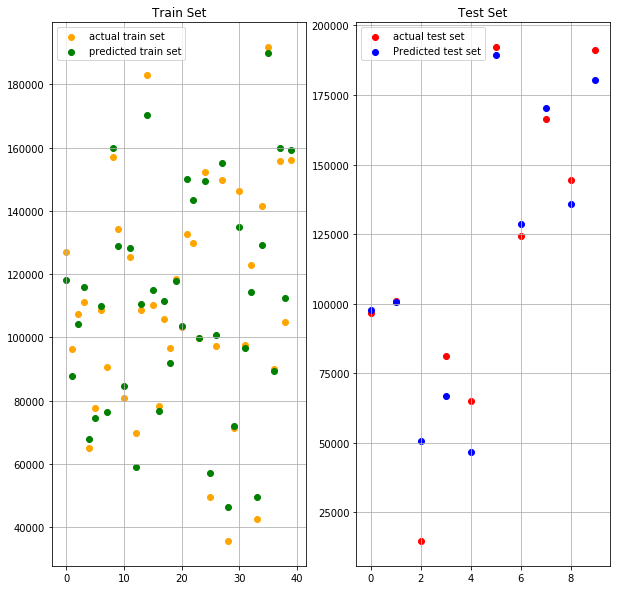

In [48]:
train_plot = plt.subplot(121)
test_plot = plt.subplot(122)
matplotlib.rcParams['figure.figsize'] = [10,10]

train_plot.grid(True)
train_plot.set_title('Train Set')
train_plot.scatter(np.arange(X_train.shape[0]),Y_train,
                   color='Orange', 
                   label = 'actual train set')

train_plot.scatter(np.arange(X_train.shape[0]),regressor.predict(X_train), 
                   color='green', 
                   label = 'predicted train set')
train_plot.legend()

test_plot.grid(True)
test_plot.set_title('Test Set')
test_plot.scatter(np.arange(X_test.shape[0]),Y_test, 
                  color='red', 
                  label = 'actual test set')

test_plot.scatter(np.arange(X_test.shape[0]),Y_pred,
                  color='blue',
                  label = 'Predicted test set')

test_plot.legend()